<a href="https://colab.research.google.com/github/npr99/Archive/blob/master/PLAN604_Correlation_SVI_HTC_tracts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlation between Social Vulnerability and Census Response Rate
 
---




In [1]:
# Python packages required to read in and Census API data
import requests ## Required for the Census API
import pandas as pd # For reading, writing and wrangling data

## Step 1: Obtain Data

In [8]:
!wget https://www.censushardtocountmaps2020.us/exports/pdb2017tract_2010MRR_2018ACS_NC.xlsx

--2021-11-01 16:19:28--  https://www.censushardtocountmaps2020.us/exports/pdb2017tract_2010MRR_2018ACS_NC.xlsx
Resolving www.censushardtocountmaps2020.us (www.censushardtocountmaps2020.us)... 104.22.43.203, 172.67.27.143, 104.22.42.203, ...
Connecting to www.censushardtocountmaps2020.us (www.censushardtocountmaps2020.us)|104.22.43.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2353146 (2.2M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘pdb2017tract_2010MRR_2018ACS_NC.xlsx’

pdb2017tract_2010MR 100%[===================>]   2.24M  6.33MB/s    in 0.4s    

2021-11-01 16:19:29 (6.33 MB/s) - ‘pdb2017tract_2010MRR_2018ACS_NC.xlsx’ saved [2353146/2353146]



In [11]:
excel_file = pd.ExcelFile('pdb2017tract_2010MRR_2018ACS_NC.xlsx')
excel_file.sheet_names  # see all sheet names

['ACS2014-18', 'ACS2014-18 PERCENTS', 'FIELDNAMES']

In [12]:
censushtc_df = pd.read_excel('pdb2017tract_2010MRR_2018ACS_NC.xlsx',sheet_name = 'ACS2014-18', usecols = "A:I", header = 5)
censushtc_df.head()

,GEOIDtxt,StateFIPS,StateAbb,StateName,CountyFIPS,CountyName,TractFIPS,MailReturnRateCen2010,LowResponseScore
0,37001020100,37,NC,North Carolina,1,Alamance County,201.00,80.5,22.4
1,37001020200,37,NC,North Carolina,1,Alamance County,202.00,78.9,27.7
2,37001020300,37,NC,North Carolina,1,Alamance County,203.00,79.9,26.2
3,37001020400,37,NC,North Carolina,1,Alamance County,204.00,75.7,28.0
4,37001020501,37,NC,North Carolina,1,Alamance County,205.01,85.8,22.2


LowResponseScore: Census Bureau's predictive model score indicating share of households likely not to self-respond to 2020 Census (from 2019 Planning Database).  "99999" means no score was calculated was recorded for this tract.

### Obtain CDC SVI data

In [13]:
 !wget https://svi.cdc.gov/Documents/Data/2018_SVI_Data/CSV/States/NorthCarolina.csv

--2021-11-01 16:25:24--  https://svi.cdc.gov/Documents/Data/2018_SVI_Data/CSV/States/NorthCarolina.csv
Resolving svi.cdc.gov (svi.cdc.gov)... 23.222.65.138, 2a02:26f0:b200:1b8::2461, 2a02:26f0:b200:195::2461
Connecting to svi.cdc.gov (svi.cdc.gov)|23.222.65.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1356310 (1.3M) [application/octet-stream]
Saving to: ‘NorthCarolina.csv’

NorthCarolina.csv   100%[===================>]   1.29M   592KB/s    in 2.2s    

2021-11-01 16:25:27 (592 KB/s) - ‘NorthCarolina.csv’ saved [1356310/1356310]



In [14]:
cdcsvi_df = pd.read_csv('NorthCarolina.csv')
cdcsvi_df.head()

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,E_NOHSDP,M_NOHSDP,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_MINRTY,M_MINRTY,E_LIMENG,M_LIMENG,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,...,SPL_THEME2,RPL_THEME2,EPL_MINRTY,EPL_LIMENG,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
0,37,NORTH CAROLINA,NC,37001,Alamance,37001020100,"Census Tract 201, Alamance County, North Carolina",1.741971,3839,330,2033,101,1832,130,1017,290,135,86,29158,6177,400,132,670,100,710,198,855,174,164,94,1484,415,42,56,224,79,30,46,6,15,...,2.3113,0.6993,0.5995,0.4903,1.0898,0.5724,0.7498,0.2985,0.2000,0.8826,0.7668,2.8977,0.7286,8.6915,0.7038,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,476,163,12.4,4.2,7533
1,37,NORTH CAROLINA,NC,37001,Alamance,37001020200,"Census Tract 202, Alamance County, North Carolina",1.333919,3929,531,1842,99,1492,136,1210,363,168,104,15631,2931,741,219,421,82,1114,296,744,227,334,125,2496,581,385,230,9,18,0,12,49,52,...,2.8664,0.9427,0.8318,0.9618,1.7936,0.9382,0.3392,0.0000,0.7359,0.7120,0.7982,2.5853,0.5904,10.8067,0.9324,1,0,1,1,3,0,0,0,1,1,0,1,1,0,0,0,0,0,0,5,659,234,16.8,5.0,2347
2,37,NORTH CAROLINA,NC,37001,Alamance,37001020300,"Census Tract 203, Alamance County, North Carolina",4.308650,7945,756,3127,147,2850,208,1611,641,219,127,17522,1939,1344,292,1640,304,2148,542,1020,261,464,182,5842,811,950,272,67,81,619,213,195,119,...,2.9490,0.9607,0.8885,0.9774,1.8659,0.9659,0.5023,0.7126,0.9378,0.5779,0.8926,3.6232,0.9491,11.5803,0.9773,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,3,1630,405,21.4,4.6,8973
3,37,NORTH CAROLINA,NC,37001,Alamance,37001020400,"Census Tract 204, Alamance County, North Carolina",4.462624,6931,570,2731,112,2466,150,2256,590,256,158,15527,2073,777,238,836,133,1952,373,949,222,437,177,5624,650,395,185,91,84,279,112,163,96,...,2.5375,0.8291,0.9286,0.9032,1.8318,0.9502,0.5604,0.5527,0.9336,0.8178,0.7447,3.6092,0.9468,11.2490,0.9607,1,0,1,0,2,0,0,0,1,1,1,1,2,0,0,1,0,0,1,6,1264,335,18.3,4.4,2574
4,37,NORTH CAROLINA,NC,37001,Alamance,37001020501,"Census Tract 205.01, Alamance County, North Ca...",2.756051,3556,480,1659,88,1436,136,841,353,197,159,27875,6993,277,146,570,102,790,209,443,162,188,99,1099,651,149,100,173,100,85,70,12,24,...,2.1977,0.6171,0.5023,0.8359,1.3382,0.7253,0.7369,0.4616,0.3000,0.0379,0.3544,1.8908,0.2816,8.0212,0.6127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,451,193,12.7,4.8,2333


In [20]:
 # Get Codebook for CDC SVI
 !wget https://svi.cdc.gov/Documents/Data/2018_SVI_Data/SVI2018Documentation.pdf

--2021-11-01 16:33:09--  https://svi.cdc.gov/Documents/Data/2018_SVI_Data/SVI2018Documentation.pdf
Resolving svi.cdc.gov (svi.cdc.gov)... 23.222.65.138, 2a02:26f0:b200:195::2461, 2a02:26f0:b200:1b8::2461
Connecting to svi.cdc.gov (svi.cdc.gov)|23.222.65.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1058489 (1.0M) [application/pdf]
Saving to: ‘SVI2018Documentation.pdf’

SVI2018Documentatio 100%[===================>]   1.01M   585KB/s    in 1.8s    

2021-11-01 16:33:11 (585 KB/s) - ‘SVI2018Documentation.pdf’ saved [1058489/1058489]



The overall tract summary ranking variable is RPL_THEMES.

## Step 2: Clean Data
Data cleaning is an important step in the data science process. This step is often the hardest and most time consuming. 

In [18]:
import numpy as np
censushtc_df.loc[censushtc_df['LowResponseScore']== 99999, 'LowResponseScore'] = np.nan

In [22]:
cdcsvi_df.loc[cdcsvi_df['RPL_THEMES']== -999, 'RPL_THEMES'] = np.nan

## Merge Data

In [25]:
merge_df = pd.merge(left = cdcsvi_df[['FIPS','RPL_THEMES']],
                    right = censushtc_df[['GEOIDtxt','LowResponseScore']],
                    left_on = ['FIPS'],
                    right_on = ['GEOIDtxt'],
                    how = 'inner')
merge_df.head()

,FIPS,RPL_THEMES,GEOIDtxt,LowResponseScore
0,37001020100,0.7038,37001020100,22.4
1,37001020200,0.9324,37001020200,27.7
2,37001020300,0.9773,37001020300,26.2
3,37001020400,0.9607,37001020400,28.0
4,37001020501,0.6127,37001020501,22.2


## Step 3: Describe the data
Descriptive methods summarize the data. Descriptive statistics summarize data with numbers, tables, and graphs. The following block of code creates and formats a table using the `describe` function. The table provides eight descriptive statistics. These include the count, the mean, the standard deviation (std), the minimum (min), the lower quartile (25%), the median (50%), the upper quartile (75%), and the maximum (max).

In [30]:
table1 = merge_df[['LowResponseScore']].describe().T
varformat = "{:,.0f}" # The variable format adds a comma and rounds up
table_title = "Table 1. Descriptive statistics for Low Response Score by census tract, 2020."
table1 = table1.style.set_caption(table_title).format(varformat).set_properties(**{'text-align': 'right'})
table1

,count,mean,std,min,25%,50%,75%,max
LowResponseScore,"2,156",21,5,6,18,21,24,43


In [28]:
table2 = merge_df[['RPL_THEMES']].describe().T
varformat = "{:,.3f}" # The variable format adds a comma and rounds up
table_title = "Table 2. Descriptive statistics for CDC SVI overall tract summary ranking variable by census tract, 2020."
table2 = table2.style.set_caption(table_title).format(varformat).set_properties(**{'text-align': 'right'})
table2

,count,mean,std,min,25%,50%,75%,max
RPL_THEMES,"2,162.000",0.500,0.289,0.000,0.250,0.500,0.750,1.000


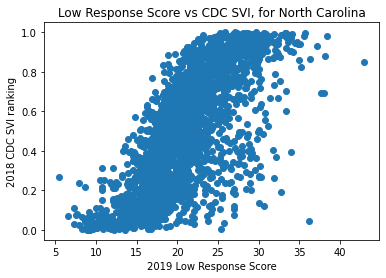

In [37]:
import matplotlib.pyplot as plt
# Scatter Plot
plt.scatter(merge_df['LowResponseScore'], merge_df['RPL_THEMES'])
plt.title('Low Response Score vs CDC SVI, for North Carolina')
plt.xlabel('2019 Low Response Score')
plt.ylabel('2018 CDC SVI ranking')
plt.show()

In [33]:
# Correlation
merge_df[['LowResponseScore','RPL_THEMES']].corr()

,LowResponseScore,RPL_THEMES
LowResponseScore,1.000000,0.709692
RPL_THEMES,0.709692,1.000000
